<a href="https://colab.research.google.com/github/isnanramalia/klasifikasi-siswa-dropout/blob/main/knn_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[dr pak junta](https://www.youtube.com/watch?v=yZY9CNcKPkY&ab_channel=JuntaZeniarja)

# Library

In [13]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import data

In [14]:
# import data
data = pd.read_csv('data_smk_askha.csv')

In [15]:
data.head()

,JK,Tanggal Lahir,Tempat Lahir,Asal Kecamatan,Jenis Tinggal,Alat Transportasi,Jenjang Pendidikan Ayh,Pekerjaan Ayh,Penghasilan Ayh,Jenjang Pendidikan Ibu,Pekerjaan Ibu,Penghasilan Ibu,Keluar Karena
0,L,2003-01-28,SEMARANG,Cilacap Tengah,Bersama orang tua,Sepeda,SMP / sederajat,Wiraswasta,"Rp. 5,000,000 - Rp. 20,000,000",D3,Karyawan Swasta,"Rp. 2,000,000 - Rp. 4,999,999",Lulus
1,L,2004-11-14,SEMARANG,Mijen,Bersama orang tua,Jalan kaki,SMA / sederajat,Karyawan Swasta,"Rp. 500,000 - Rp. 999,999",SMP / sederajat,Karyawan Swasta,"Rp. 2,000,000 - Rp. 4,999,999",Lulus
2,L,2006-05-26,Semarang,Ngaliyan,Bersama orang tua,Ojek,SD / sederajat,Karyawan Swasta,"Rp. 1,000,000 - Rp. 1,999,999",SMP / sederajat,Tidak bekerja,Tidak Berpenghasilan,Mutasi
3,L,1998-07-08,TEGAL,Balapulang,Panti asuhan,Sepeda motor,SD / sederajat,Buruh,"Rp. 1,000,000 - Rp. 1,999,999",SD / sederajat,Buruh,"Rp. 1,000,000 - Rp. 1,999,999",Lulus
4,L,1995-12-18,SEMARANG,Semarang,Asrama,Jalan kaki,SD / sederajat,Petani,NaN,SD / sederajat,Petani,NaN,Lulus


# Data Preprocessing

In [16]:
data['Tanggal Lahir'] = pd.to_datetime(data['Tanggal Lahir']).dt.year

In [17]:
data.head()

,JK,Tanggal Lahir,Tempat Lahir,Asal Kecamatan,Jenis Tinggal,Alat Transportasi,Jenjang Pendidikan Ayh,Pekerjaan Ayh,Penghasilan Ayh,Jenjang Pendidikan Ibu,Pekerjaan Ibu,Penghasilan Ibu,Keluar Karena
0,L,2003,SEMARANG,Cilacap Tengah,Bersama orang tua,Sepeda,SMP / sederajat,Wiraswasta,"Rp. 5,000,000 - Rp. 20,000,000",D3,Karyawan Swasta,"Rp. 2,000,000 - Rp. 4,999,999",Lulus
1,L,2004,SEMARANG,Mijen,Bersama orang tua,Jalan kaki,SMA / sederajat,Karyawan Swasta,"Rp. 500,000 - Rp. 999,999",SMP / sederajat,Karyawan Swasta,"Rp. 2,000,000 - Rp. 4,999,999",Lulus
2,L,2006,Semarang,Ngaliyan,Bersama orang tua,Ojek,SD / sederajat,Karyawan Swasta,"Rp. 1,000,000 - Rp. 1,999,999",SMP / sederajat,Tidak bekerja,Tidak Berpenghasilan,Mutasi
3,L,1998,TEGAL,Balapulang,Panti asuhan,Sepeda motor,SD / sederajat,Buruh,"Rp. 1,000,000 - Rp. 1,999,999",SD / sederajat,Buruh,"Rp. 1,000,000 - Rp. 1,999,999",Lulus
4,L,1995,SEMARANG,Semarang,Asrama,Jalan kaki,SD / sederajat,Petani,NaN,SD / sederajat,Petani,NaN,Lulus


In [18]:
data["JK"] = pd.factorize(data.JK)[0]
data["Tempat Lahir"] = pd.factorize(data["Tempat Lahir"])[0]
data["Asal Kecamatan"] = pd.factorize(data["Asal Kecamatan"])[0]
data["Jenis Tinggal"] = pd.factorize(data["Jenis Tinggal"])[0]
data["Alat Transportasi"] = pd.factorize(data["Alat Transportasi"])[0]
data["Jenjang Pendidikan Ayh"] = pd.factorize(data["Jenjang Pendidikan Ayh"])[0]
data["Pekerjaan Ayh"] = pd.factorize(data["Pekerjaan Ayh"])[0]
data["Penghasilan Ayh"] = pd.factorize(data["Penghasilan Ayh"])[0]
data["Jenjang Pendidikan Ibu"] = pd.factorize(data["Jenjang Pendidikan Ibu"])[0]
data["Pekerjaan Ibu"] = pd.factorize(data["Pekerjaan Ibu"])[0]
data["Penghasilan Ibu"] = pd.factorize(data["Penghasilan Ibu"])[0]
data["Keluar Karena"] = pd.factorize(data["Keluar Karena"])[0]

# save data
data.to_csv("data_numerik.csv")

In [19]:
data.head()

,JK,Tanggal Lahir,Tempat Lahir,Asal Kecamatan,Jenis Tinggal,Alat Transportasi,Jenjang Pendidikan Ayh,Pekerjaan Ayh,Penghasilan Ayh,Jenjang Pendidikan Ibu,Pekerjaan Ibu,Penghasilan Ibu,Keluar Karena
0,0,2003,0,0,0,0,0,0,0,0,0,0,0
1,0,2004,0,1,0,1,1,1,1,1,0,0,0
2,0,2006,1,2,0,2,2,1,2,1,1,1,1
3,0,1998,2,3,1,3,2,2,2,2,2,2,0
4,0,1995,0,4,2,1,2,3,-1,2,3,-1,0


# Processing Data

In [20]:
dataset = pd.read_csv("data_numerik.csv")
x = dataset.iloc[:,[1,12]].values
y = dataset.iloc[:, -13].values

In [21]:
print(x)

[[ 0  0]
 [ 0  0]
 [ 0  1]
 ...
 [ 1 -1]
 [ 1  2]
 [ 1  0]]


In [22]:
print(y)

[0 0 0 ... 1 1 1]


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =0)

In [27]:
print(x)

[[ 0  0]
 [ 0  0]
 [ 0  1]
 ...
 [ 1 -1]
 [ 1  2]
 [ 1  0]]


In [29]:
print(x_train)

[[ 1  2]
 [ 0 -1]
 [ 0  2]
 ...
 [ 0  1]
 [ 0  0]
 [ 0  1]]


In [31]:
len(x_train)

777

In [33]:
len(x_test)

259

In [35]:
len(y)

1036

In [37]:
len(y_test)

259

In [39]:
len(y_train)

777

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
print(x_train)

[[ 1.30304131  0.5163461 ]
 [-0.76743538 -1.29086524]
 [-0.76743538  0.5163461 ]
 ...
 [-0.76743538 -0.08605768]
 [-0.76743538 -0.68846146]
 [-0.76743538 -0.08605768]]


In [45]:
print(x_test)

[[-0.76743538  0.5163461 ]
 [ 1.30304131  0.5163461 ]
 [ 1.30304131 -1.29086524]
 [-0.76743538 -1.29086524]
 [ 1.30304131  0.5163461 ]
 [ 1.30304131  1.11874987]
 [-0.76743538 -0.08605768]
 [ 1.30304131 -1.29086524]
 [ 1.30304131 -0.68846146]
 [ 1.30304131 -1.29086524]
 [ 1.30304131  0.5163461 ]
 [-0.76743538  0.5163461 ]
 [-0.76743538 -0.08605768]
 [-0.76743538 -0.08605768]
 [-0.76743538  1.11874987]
 [ 1.30304131  0.5163461 ]
 [ 1.30304131  1.72115365]
 [-0.76743538 -1.29086524]
 [-0.76743538  1.11874987]
 [-0.76743538 -0.68846146]
 [-0.76743538  0.5163461 ]
 [ 1.30304131 -1.29086524]
 [ 1.30304131 -1.29086524]
 [-0.76743538  0.5163461 ]
 [ 1.30304131 -1.29086524]
 [ 1.30304131  1.11874987]
 [-0.76743538 -1.29086524]
 [-0.76743538 -1.29086524]
 [-0.76743538 -1.29086524]
 [-0.76743538 -1.29086524]
 [ 1.30304131  1.11874987]
 [-0.76743538 -1.29086524]
 [-0.76743538 -1.29086524]
 [-0.76743538 -0.08605768]
 [-0.76743538 -0.08605768]
 [-0.76743538  1.11874987]
 [-0.76743538  1.11874987]
 

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred = classifier.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[152   0]
 [  0 107]]


<ipython-input-53-5c527e680f8e>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


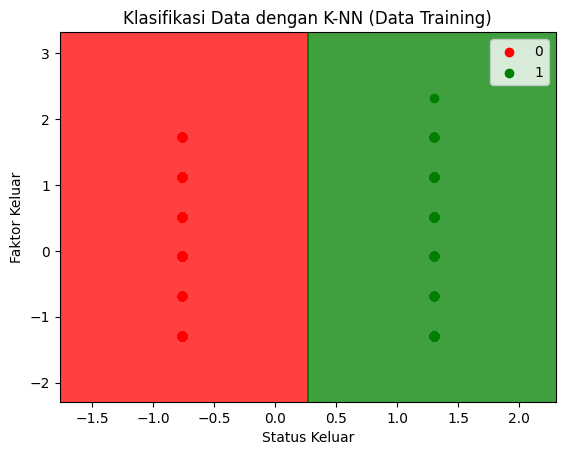

In [53]:
# liat visualisasi
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train

# untuk membuat kotaknya
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Klasifikasi Data dengan K-NN (Data Training)')
plt.xlabel('Status Keluar')
plt.ylabel('Faktor Keluar')
plt.legend()
plt.show()
